<a href="https://colab.research.google.com/github/lukasz86s/PojazdLegoTechnic/blob/master/speed_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from timeit import default_timer as dt

class SpeedTest:
  def __enter__(self):
    self.start = dt()
    return self

  def __exit__(self, type, *args):
    end = dt()
    print(end - self.start)

with SpeedTest():
  for i in range(1000):
    for g in range(10000):
      z = i*g
print(z)

In [6]:
import numpy as np
import pandas as pd

def fetch_financial_data(company="AMZN"):
  """return data form spooq.pl"""
  import pandas_datareader.data as web
  return web.DataReader(name=company, data_source='stooq')

df =fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2021-03-19 to 2016-03-23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


[9.722, 9.489, 7.364, 5.683, 4.755, nan, nan]
-1.769


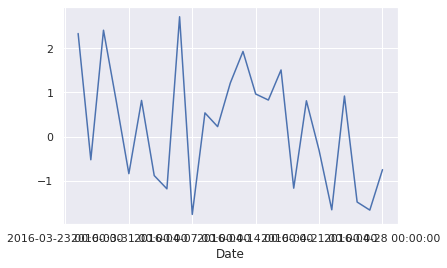

In [142]:
tekst ='kotek'  #@param ["None", 12, 12 ,2333, "True"] {type: "raw", allow-input: true} 
np.set_printoptions(precision=3, suppress=True)
save = df

save = save.sort_index()
max_rows = 26 #@param {type:"slider", min:0, max:1460, step:1}
save = save.iloc[:max_rows]
save.columns = [c.lower() for c in save.columns]
save['shclose'] = save["close"].shift()
save["grow %"] =  [np.round(p*100, decimals=3) for p in (save['close']/save['shclose'] - 1)]
total =  [np.round((j/i-1)*100, decimals=3) for i, j in zip(save.iloc[0], save.iloc[-1]) if type(i) is not str]
print(total)
x = {}
for nr, value in enumerate(total):
  x[save.columns[nr]] = value
x = pd.Series(x, name='Total %')
save = save.append(x, ignore_index=False)
print(save['grow %'].min())
import seaborn as sns
sns.set()
#save['grow %'].hist(bins=30)
save['grow %'].plot()


